# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_excel('GermanCredit.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [4]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 2. Check how many records do we have


In [5]:
df.shape

(1000, 3)

In [6]:
df.columns

Index(['Creditability', 'CreditAmount', 'DurationOfCreditInMonths'], dtype='object')

In [14]:
df

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12
...,...,...,...
995,0,1987,24
996,0,2303,24
997,0,12680,21
998,0,6468,12


# 3. Plot Histogram for column 'CreditAmount'

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

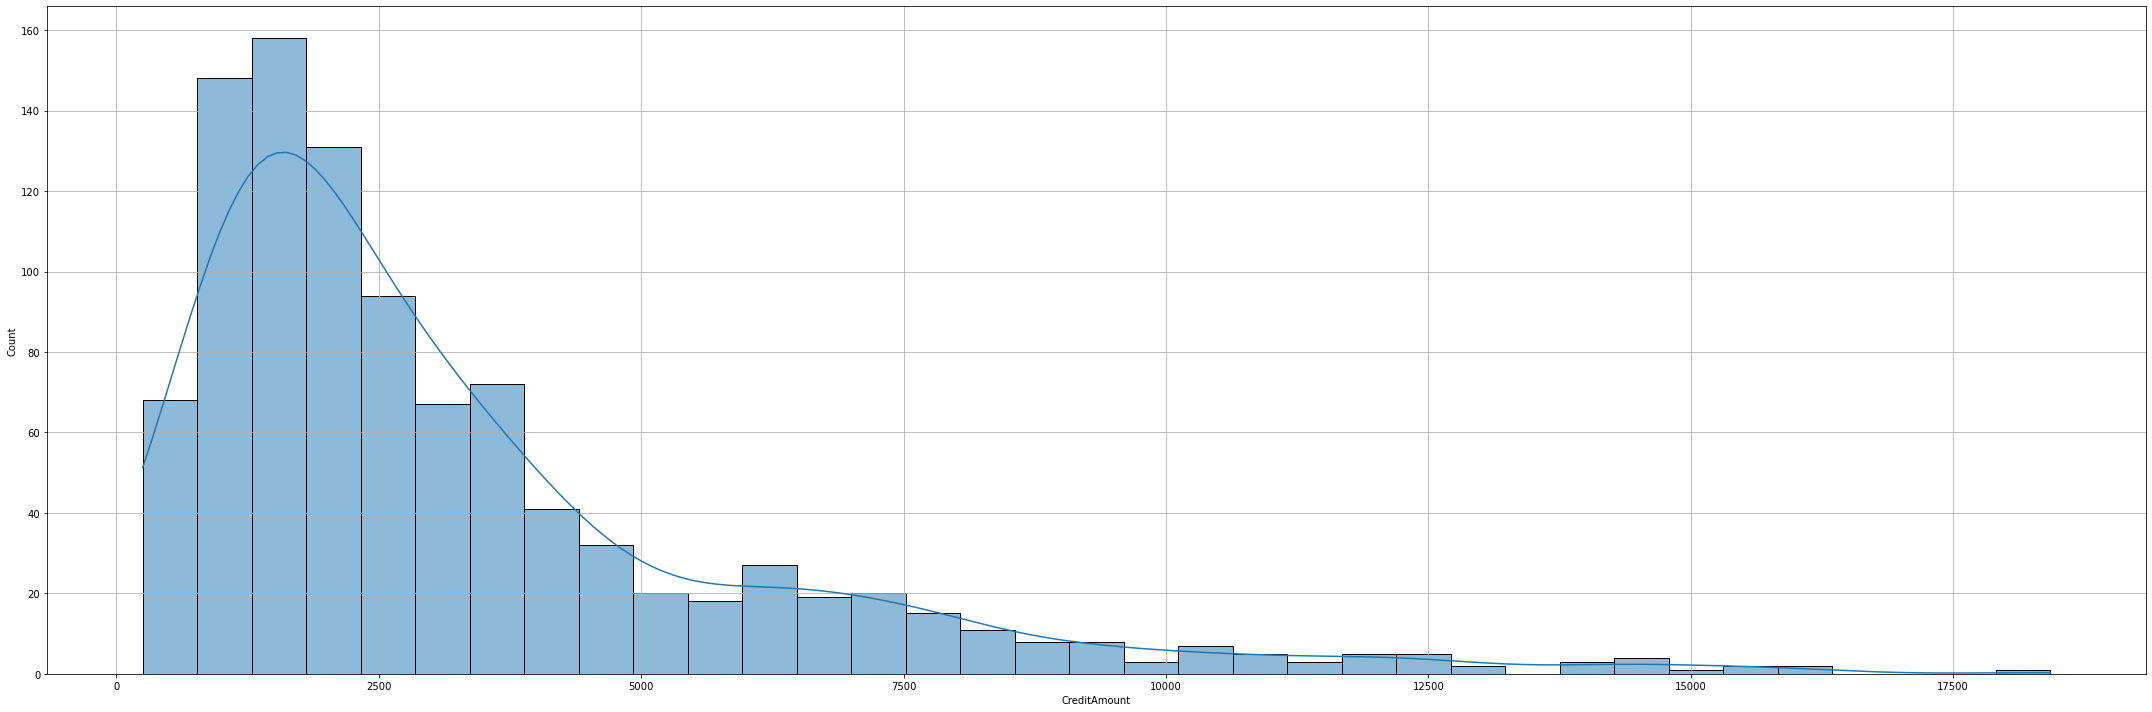

In [13]:
plt.rcParams['figure.figsize']=[30,10]
sns.histplot(df.CreditAmount,kde=True)
plt.grid(True)
plt.tight_layout()
plt.show()


# 3b. Create creditability dataframe

In [17]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [18]:
df1=df.loc[df.Creditability==1,]
df2=df.loc[df.Creditability==0,]

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12
...,...,...,...
746,1,2760,24
747,1,5507,24
748,1,1199,9
749,1,2892,24


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [22]:
df3=pd.concat([df1,df2],axis=1)

In [25]:
df1.shape,df2.shape

((700, 3), (300, 3))

In [26]:
# Credibiliity1 has 700 records
# Credibiliity0 has 300 records

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

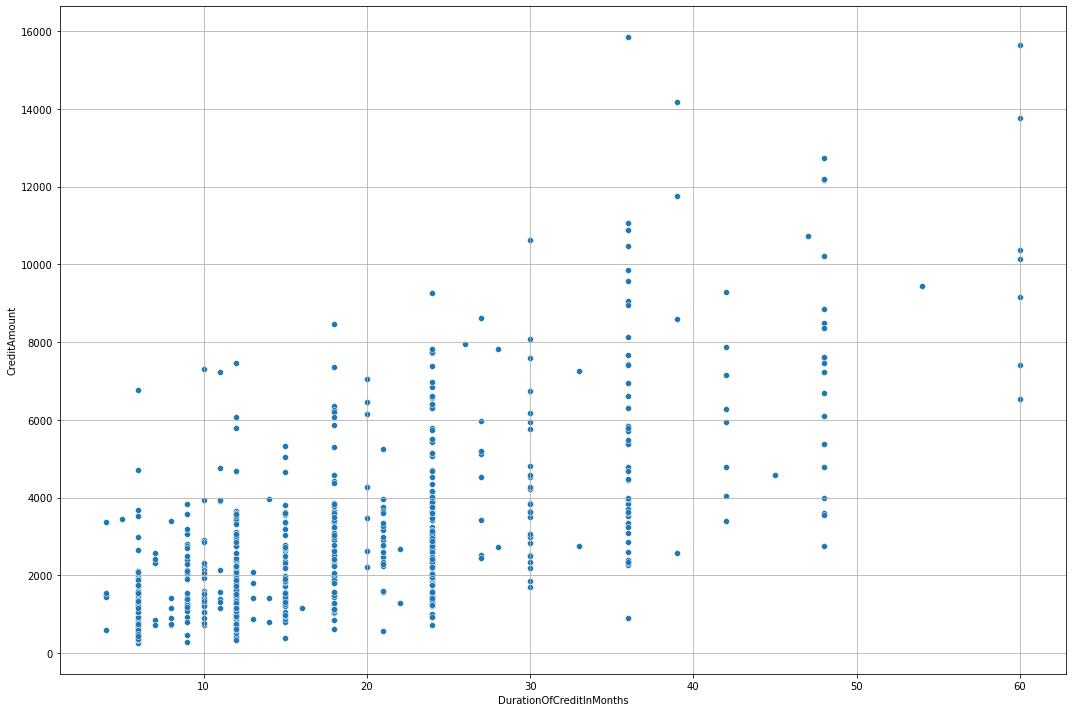

In [33]:
#Credibility == 1
plt.rcParams['figure.figsize']=[15,10]
sns.scatterplot(x=df1.DurationOfCreditInMonths,y=df1.CreditAmount)
plt.tight_layout()
plt.grid(True)
plt.show()

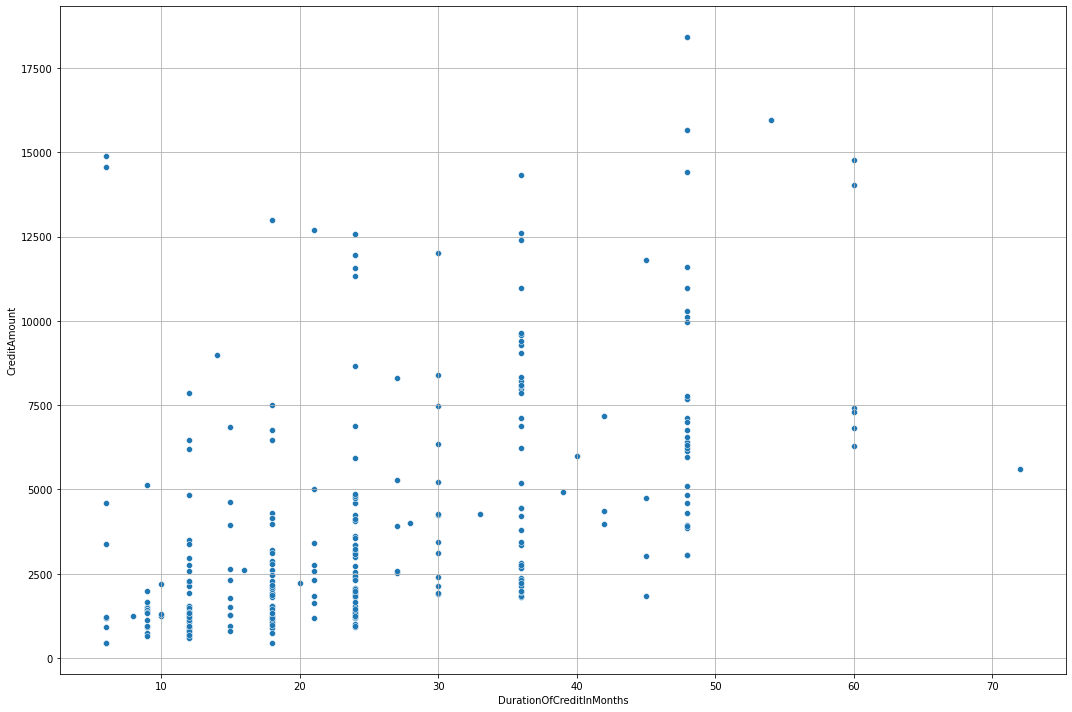

In [34]:
#Credibility == 0 
plt.rcParams['figure.figsize']=[15,10]
sns.scatterplot(x=df2.DurationOfCreditInMonths,y=df2.CreditAmount)
plt.tight_layout()
plt.grid(True)
plt.show()

# 6. Prepare input data for the model

In [39]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [40]:
x=df.drop('Creditability',axis=1)
y=df[['Creditability']]
x=sm.add_constant(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 10, test_size = 0.3)

# 7. Fit logistic regression model

In [41]:
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.575767
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                 0.04177
Time:                        18:21:47   Log-Likelihood:                -403.04
converged:                       True   LL-Null:                       -420.61
Covariance Type:            nonrobust   LLR p-value:                 2.339e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7605      0.177      9.948      0.000       1.414       2.107
CreditAmount              -5.37e-05   3.71e-05     -1.447      0.148      -0.000    1.91e-05
DurationOfCreditInMonths    -0.0317      0.009     -3.600      0.000      -0.049      -0.014
============================================================================================
"""

In [43]:
pred=model1.predict(xtest)

In [48]:
thresh=[0 if X<0.5 else 1 for X in pred]

In [45]:
from sklearn.metrics import confusion_matrix

# 8. Test accuracy calculation

In [50]:
cm=confusion_matrix(ytest,thresh) # On 0.5 threshhold value 

In [51]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

accuracy=(TN+TP)/(TN+FP+FN+TP)

print('Accuracy:',accuracy)

Accuracy: 0.67


# 9. Build a confusion matrix

In [52]:
confusion_matrix(ytest,thresh)

array([[ 11,  87],
       [ 12, 190]])

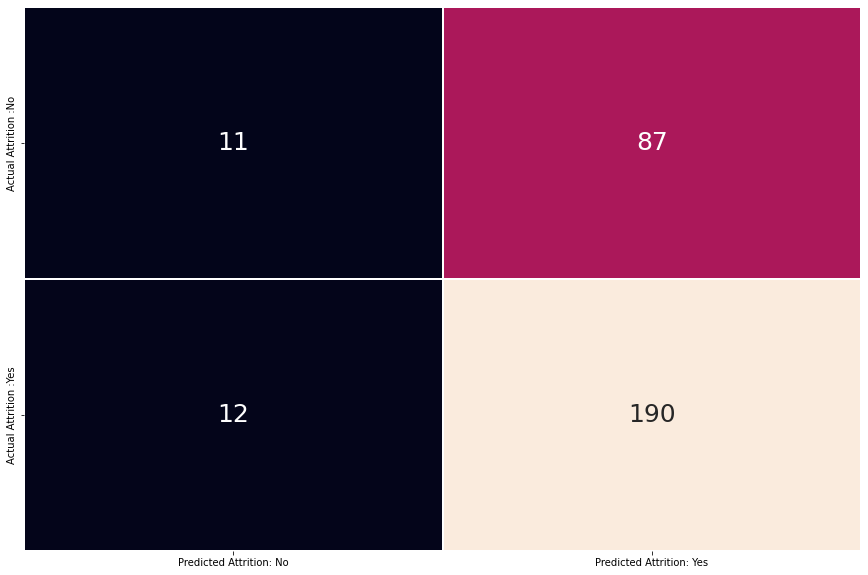

In [53]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [54]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics

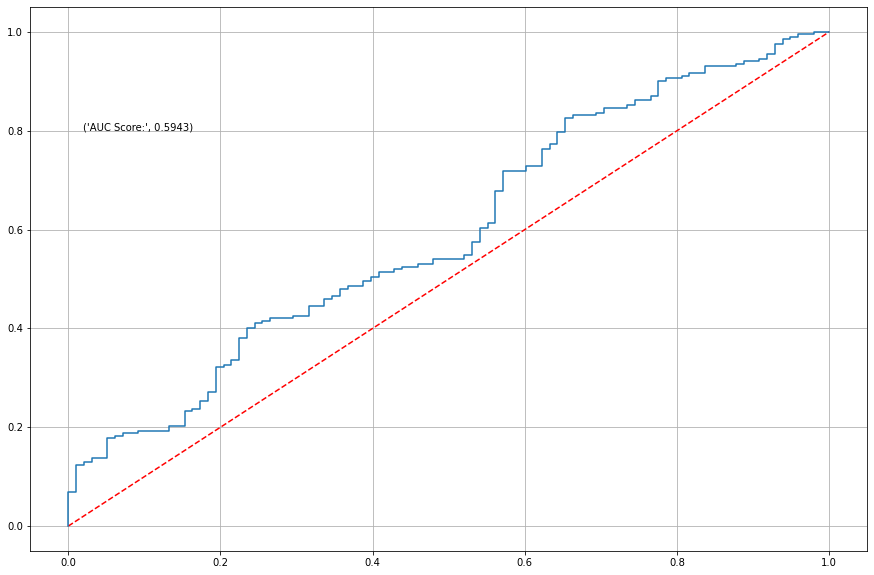

In [55]:
fpr, tpr, thresholds = roc_curve(ytest,pred)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(ytest, pred),4)))
plt.grid(True)
plt.show()